## Assignment 1 - Exploratory Data Analysis

#### Step 1: Find and download a dataset.

In [1]:
# StreetEasy is New York City’s leading real estate marketplace. You will be working with a
# dataset that contains a sample of 5,000 rentals listings in Manhattan.
# https://www.kaggle.com/zohaib30/streeteasy-dataset?select=manhattan.csv

In [2]:
# imports
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt

In [3]:
manhattan = pd.read_csv('manhattan.csv')
manhattan.shape
#below we can see our dataset has 3539 rows and 18 columns 

(3539, 18)

#### Step 2: Divide into a training set and a testing set. Use scikitlearn to divide you data into training and testing sets. Make sure that the testing and training sets are balanced in terms of target classes

In [4]:
y = manhattan["rent"]
print(y.head())

0     2550
1    11500
2     4500
3     4795
4    17500
Name: rent, dtype: int64


In [5]:
X = manhattan.drop(["rent"], axis=1)
print(X.head())

   rental_id  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545       0.0          1        480              9    2.0   
1       2472       2.0          2       2000              4    1.0   
2       2919       1.0          1        916              2   51.0   
3       2790       1.0          1        975              3    8.0   
4       3946       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0             1               1          0      

In [6]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Step 3: Explore your training set. Import your data into a Pandas data frame and use the following pandas functions to explore your data

In [7]:
X_train.isnull().sum() # not missing values

rental_id           0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [8]:
X_train.describe() 

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000
mean,5296.205727,1.349849,1.368500,940.456669,4.900151,11.902600,51.725697,0.396383,0.156745,0.163904,0.282216,0.300678,0.190279,0.052751,0.176714
std,3318.025785,0.970623,0.602047,477.489348,5.344821,11.058595,39.298995,0.489238,0.363628,0.370258,0.450163,0.458639,0.392595,0.223577,0.381499
min,1.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2402.500000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5063.500000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8159.000000,2.000000,2.000000,1150.000000,6.000000,17.000000,89.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11349.000000,5.000000,5.000000,3680.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2654 entries, 2079 to 2732
Data columns (total 17 columns):
rental_id           2654 non-null int64
bedrooms            2654 non-null float64
bathrooms           2654 non-null int64
size_sqft           2654 non-null int64
min_to_subway       2654 non-null int64
floor               2654 non-null float64
building_age_yrs    2654 non-null int64
no_fee              2654 non-null int64
has_roofdeck        2654 non-null int64
has_washer_dryer    2654 non-null int64
has_doorman         2654 non-null int64
has_elevator        2654 non-null int64
has_dishwasher      2654 non-null int64
has_patio           2654 non-null int64
has_gym             2654 non-null int64
neighborhood        2654 non-null object
borough             2654 non-null object
dtypes: float64(2), int64(13), object(2)
memory usage: 373.2+ KB


#### Step 4: Data cleaning. Address any missing values in your training set. Include the code in your Jupyter notebook and create a second, cleaned, version of your dataset. Then apply the same procedure to you test set (if you are putting in replacement values use IMPUTER in scikitlearn).


In [10]:
X_train_cleaned = X_train.copy() # train dataset

In [12]:
# I used factorize to convert the neighborhoods to numerical values becauses I believe it is an important variable
X_train_cleaned["neighborhood_code"] = pd.factorize(X_train_cleaned.neighborhood)[0]

In [13]:
# I'm dropping the neighborhood and borough to eliminate the string values
X_train_cleaned = X_train_cleaned.drop(["borough","neighborhood"], axis=1)

In [14]:
X_train_cleaned.head(3) # new dataset without string values

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood_code
2079,901,3.0,2,800,13,46.0,9,1,0,0,0,0,0,0,0,0
1324,6483,1.0,1,586,2,20.0,16,1,0,1,1,1,1,1,1,1
3505,378,0.0,1,530,2,11.0,120,1,0,0,0,0,0,0,0,2


In [19]:
X_test_cleaned = X_train.copy()

In [21]:
X_test_cleaned["neighborhood_code"] = pd.factorize(X_test_cleaned.neighborhood)[0]

In [22]:
X_test_cleaned = X_test_cleaned.drop(["borough","neighborhood"], axis=1)

In [23]:
X_test_cleaned.head(3)

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood_code
2079,901,3.0,2,800,13,46.0,9,1,0,0,0,0,0,0,0,0
1324,6483,1.0,1,586,2,20.0,16,1,0,1,1,1,1,1,1,1
3505,378,0.0,1,530,2,11.0,120,1,0,0,0,0,0,0,0,2


#### Step 5: Visualize the data in your training set. At a minimum, use the following pandas functions to visualize the data in your Jupyter notebook.

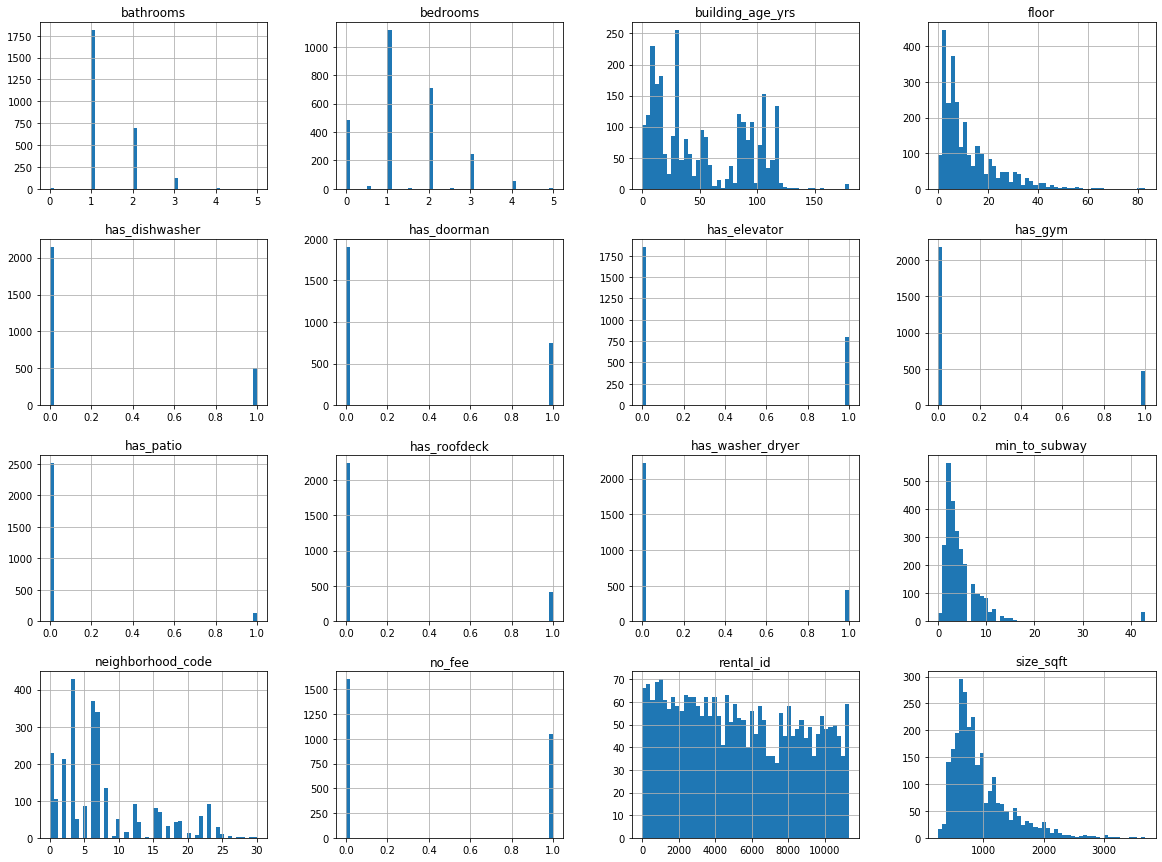

In [44]:
X_train_cleaned.hist(bins=50, figsize=(20,15)) 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000194C7D85DC8>,
      dtype=object)

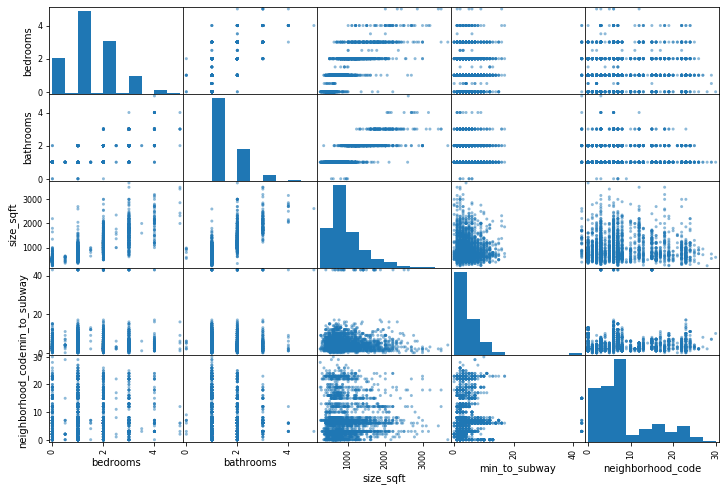

In [42]:
from pandas.plotting import scatter_matrix

attributes = ["bedrooms", "bathrooms", "size_sqft", "min_to_subway", "neighborhood_code"]
scatter_matrix(X_train_cleaned[attributes], figsize=(12, 8))

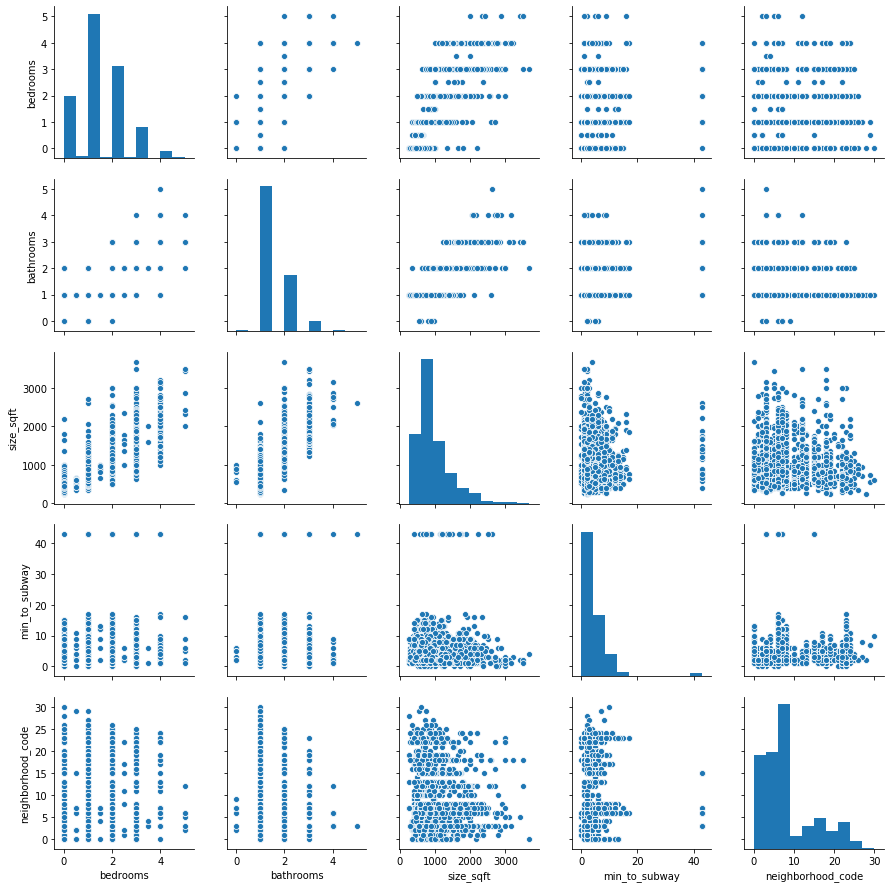

In [43]:
attributes = ["bedrooms", "bathrooms", "size_sqft", "min_to_subway", "neighborhood_code"]
sns.pairplot(X_train_cleaned[attributes])

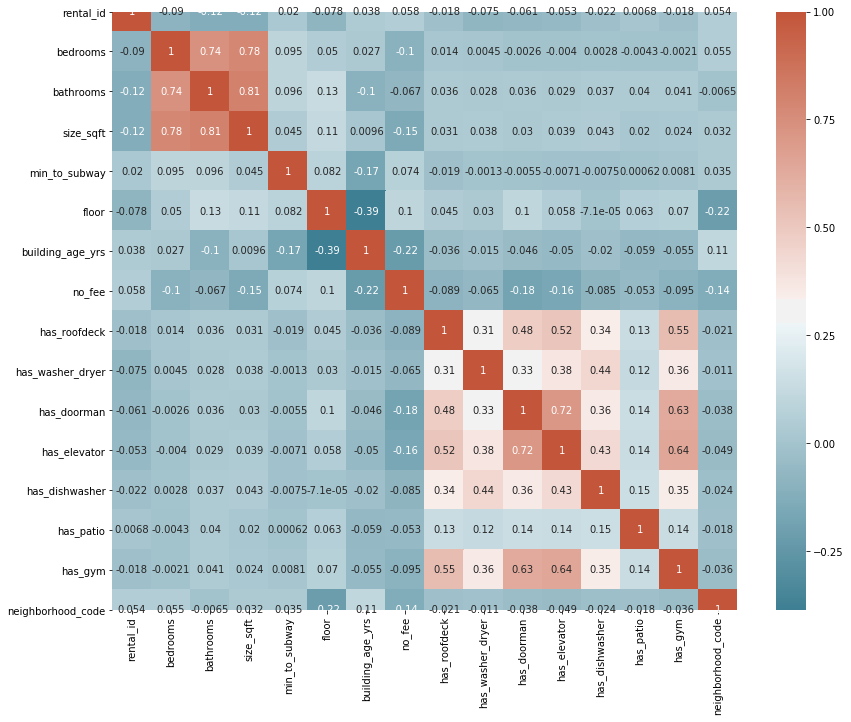

In [37]:
fig_dims = (14, 11)
fig, ax = plt.subplots(figsize=fig_dims)
corr = X_train_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax, cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### Step 6: Apply transformations to your data. In your Jupetyr notebook apply, squaring, cubing, logarithmic, and exponentials transformations to two features in your dataset. Plot the histograms and scatter matrices of the resultant data.